In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

sns.set_style(style='darkgrid')


1. Read the column description and ensure you understand each attribute well
Done

2. Perform univariate analysis of each and every attribute - use an appropriate plot
for a given attribute and mention your insights (5 points)

dataset shape is (5000,13) with no missing values
there is continuous and categorical data
'Age', 'Experience', 'Income','Family', 'CCAvg', and 'Mortgage' are continuous columns
'ZIP Code', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online' and 'CreditCard' are categorical
all the columns are numeric

-3 is not a valid entry for experience, that must have been an invalid entry
as expected age has a normal distribution
mortagage has mean of 56 and max is 635 with median value as 0 (50%), its very skewed 
zipcode can be ignored for this analysis as it doesnot make sense to anlayse the numerical value
income has outliers and is left skewed

plotted histogram for continuous data and bar plot for categorical data

all the initial observations are evident from the graphs as well
Income and CCAvg are significantly right skewed
experience and age have a uniform distribution
Majority are using online internet banking
less people are using credit cards

3. Perform correlation analysis among all the variables - you can use Pairplot and
Correlation coefficients of every attribute with every other attribute (5 points)

Found huge correlation between 'Age' and 'Experience' and also 'Income' and 'credit card spending'
'Mortgage' has a correlation with 'Income'.
'Income' and 'CCAvg' individually seem to be good predictors of the target

4. One hot encode the Education variable (3 points)
Done

5. Separate the data into dependant and independent variables and create training
and test sets out of them (X_train, y_train, X_test, y_test) (2 points)
Done

6. Use StandardScaler( ) from sklearn, to transform the training and test data into
scaled values ( fit the StandardScaler object to the train data and transform train
and test data using this object, making sure that the test set does not influence
the values of the train set) (5 points)
Done

7. Write a function which takes a model, X_train, X_test, y_train and y_test as input
and returns the accuracy, recall, precision, specificity, f1_score of the model
trained on the train set and evaluated on the test set (5 points)
Done


8. Employ multiple Classification models (Logistic, K-NN, Naïve Bayes etc) and use
the function from step 7 to train and get the metrics of the model (15 points)
Done

9. Create a dataframe with the columns - “Model”, “accuracy”, “recall”, “precision”,
“specificity”, “f1_score”. Populate the dataframe accordingly (5 points)
Done

10. Give your reasoning on which is the best model in this case (5 points)
SVM seems to be the best fit model for this dataset

In [7]:
df = pd.read_csv('Bank_Personal_Loan_Data.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
df.set_index('ID', inplace = True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [10]:
df.drop(columns='ZIP Code', inplace = True) 

C:\Users\manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\manoj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

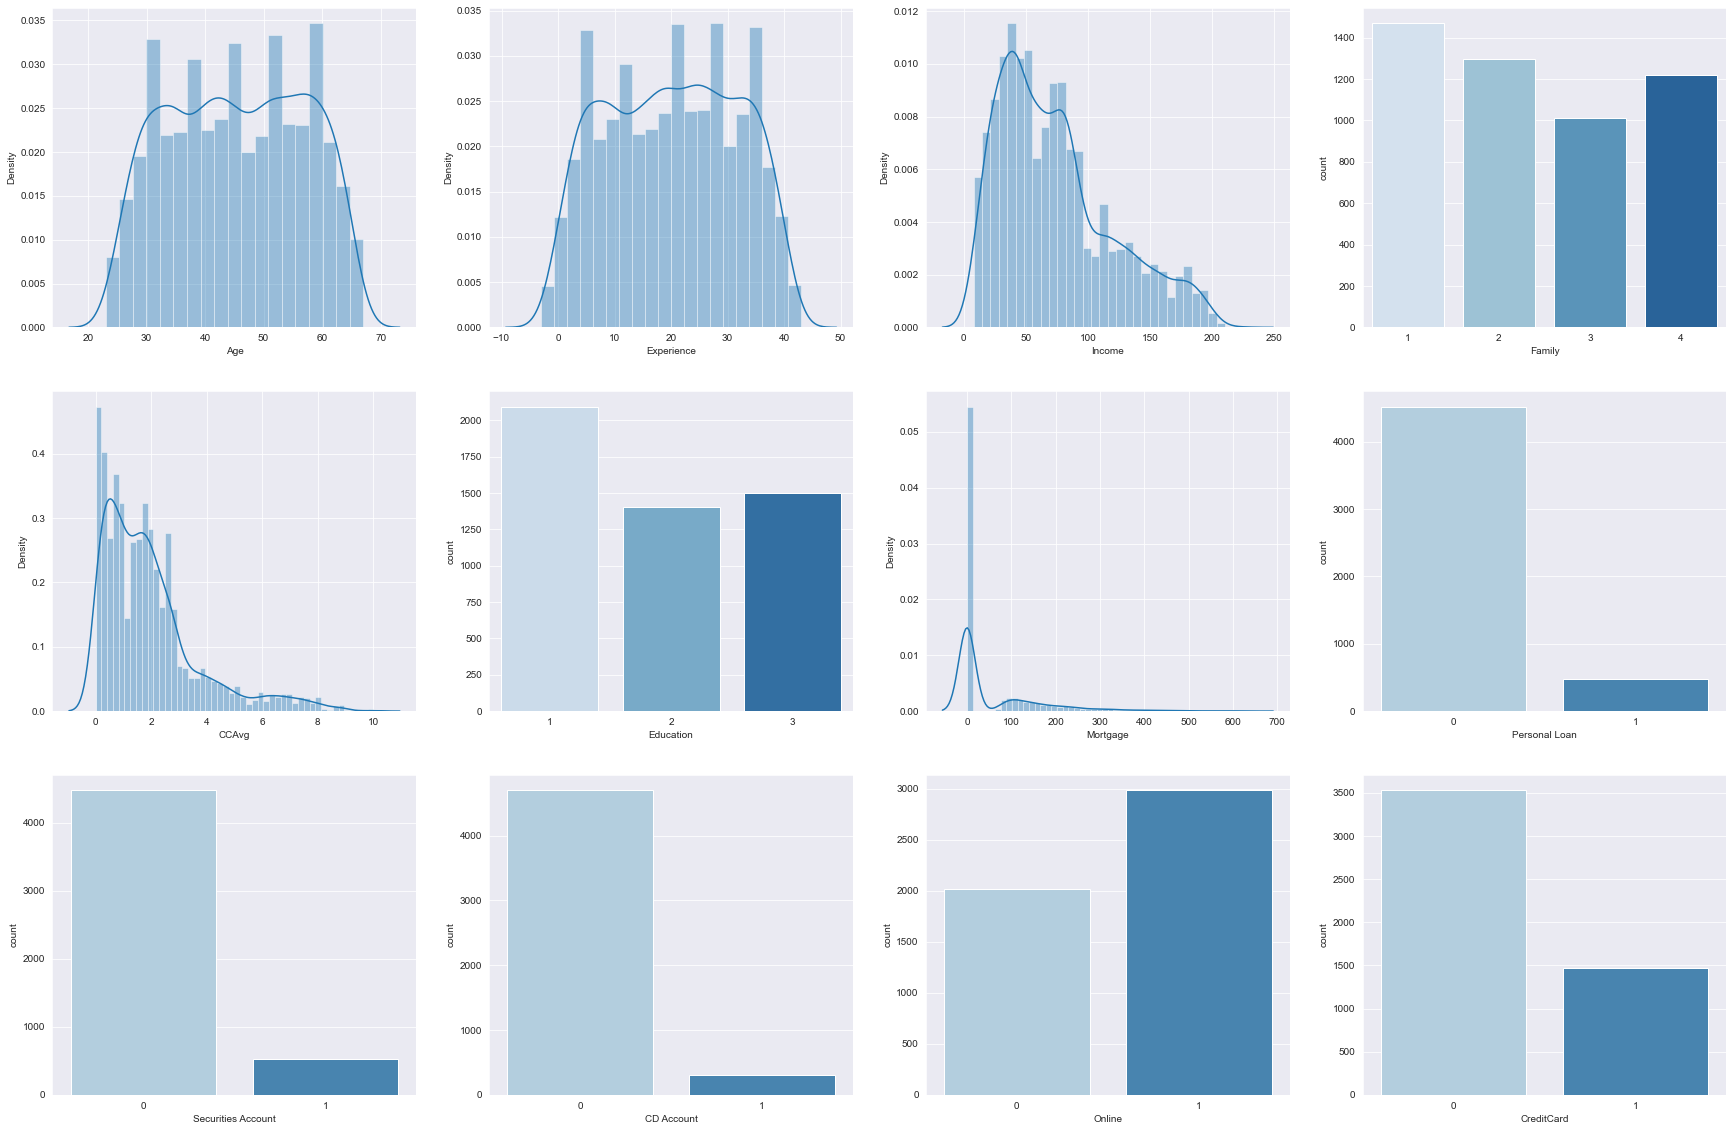

In [11]:
plt.figure(figsize= (30,20))
pos = 1
for feature in df.columns:
    plt.subplot(3, 4, pos)
    if feature in ['Age', 'Experience', 'Income','CCAvg', 'Mortgage']:
         sns.distplot(df[feature], kde= True )   
    else:
        sns.countplot(df[feature], palette= 'Blues')
    pos += 1 


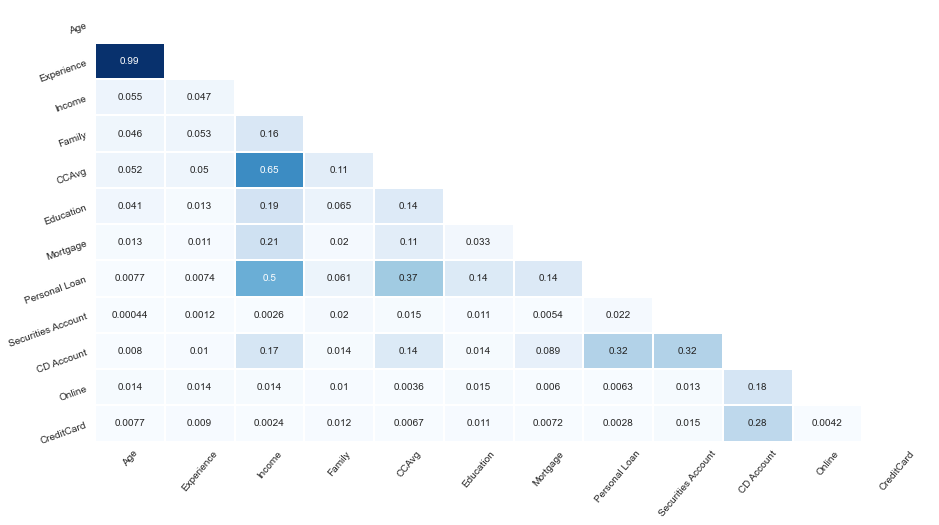

In [12]:
corr = abs(df.corr())
lower_triangle = np.tril(corr, k = -1)
mask = lower_triangle == 0 

plt.figure(figsize = (15,8))
sns.set_style(style = 'white') 
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)
plt.xticks(rotation = 50)  
plt.yticks(rotation = 20)
plt.show()

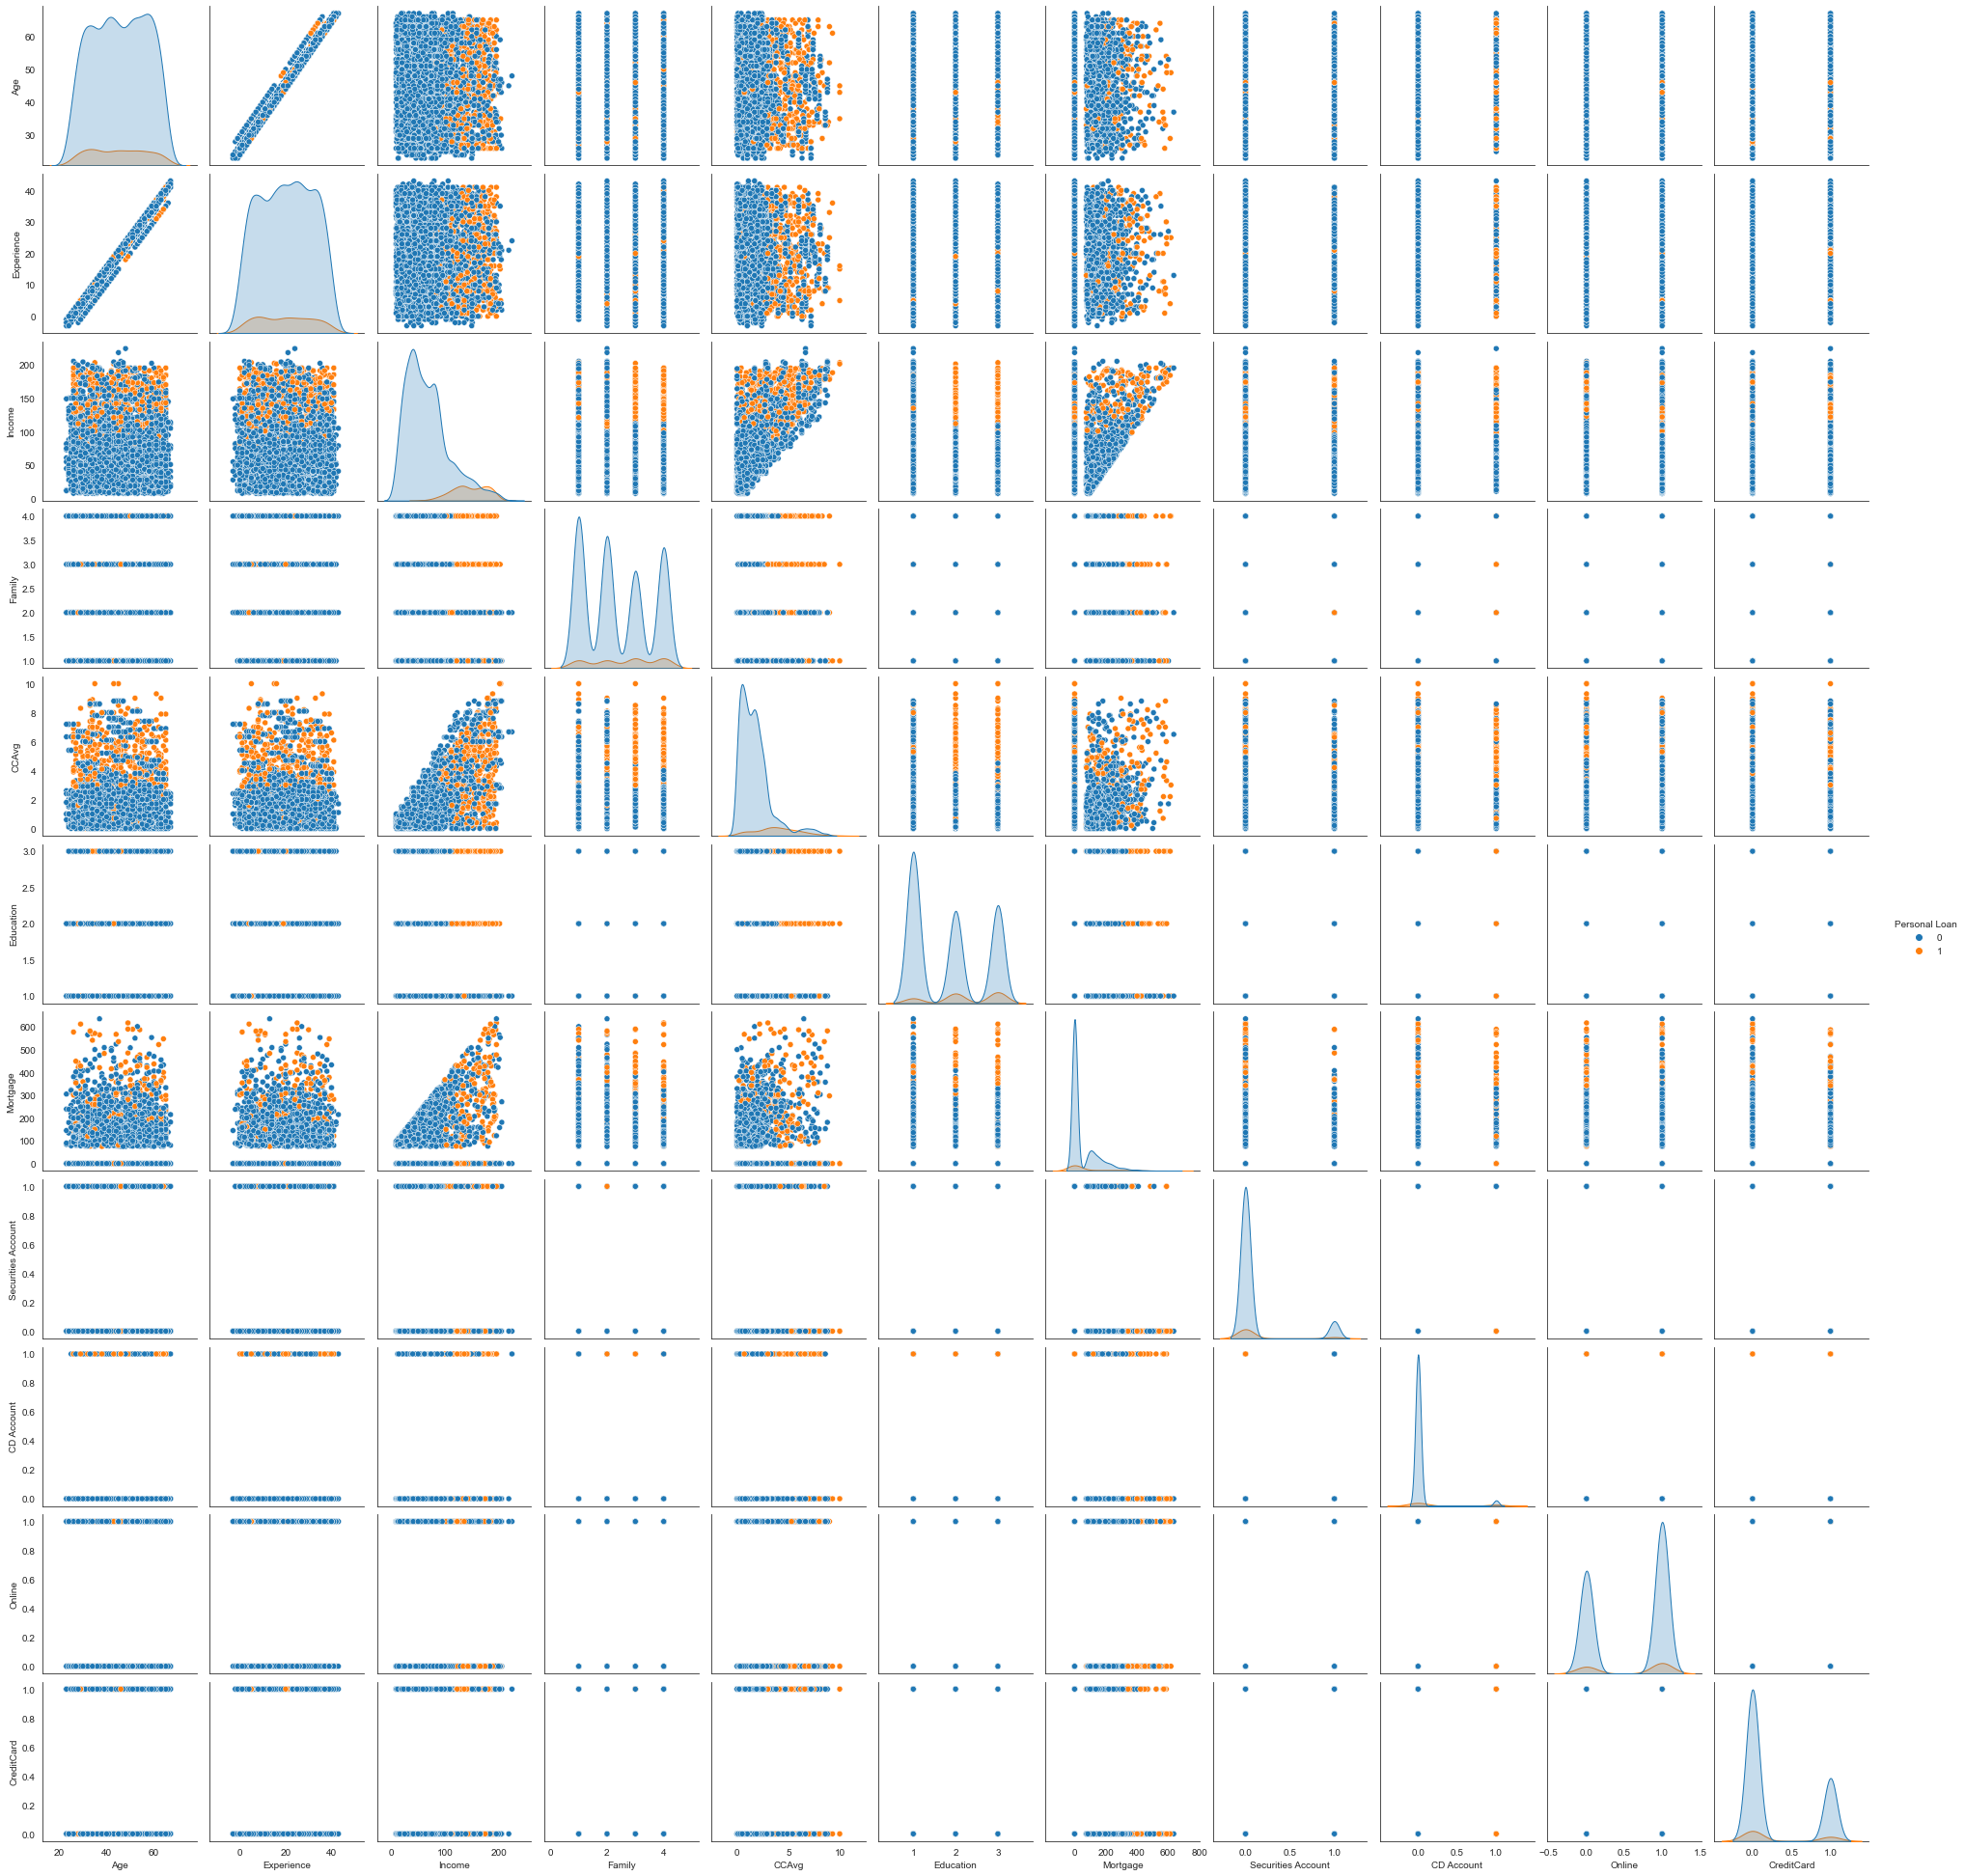

In [13]:
sns.pairplot(df, hue = 'Personal Loan', diag_kind='kde')    # pairplot
plt.show()

In [14]:
df = pd.get_dummies(df, columns= ['Education'], drop_first=True)

In [16]:
X = df.drop(columns='Personal Loan')
y = df.loc[:,'Personal Loan']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, stratify = y)

scaler = StandardScaler()

scaler.fit(X_train.loc[:,['Age','Experience','Income','CCAvg','Mortgage', 'Family']])

X_train_scaled = scaler.transform(X_train.loc[:,['Age','Experience','Income','CCAvg','Mortgage', 'Family']])
X_test_scaled = scaler.transform(X_test.loc[:,['Age','Experience','Income','CCAvg','Mortgage', 'Family']])


X_train.loc[:,['Age','Experience','Income','CCAvg','Mortgage', 'Family']] = X_train_scaled 
X_test.loc[:,['Age','Experience','Income','CCAvg','Mortgage', 'Family']] = X_test_scaled

C:\Users\manoj\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [18]:
def fit_n_print(model, X_train, X_test, y_train, y_test):
    from sklearn import metrics
    
    model.fit(X_train, y_train)  

    pred = model.predict(X_test) 

    score = round(model.score(X_test, y_test), 3) 

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel() 

    recall = round(tp/(tp+fn), 3)   
    precision = round(tp/(tp+fp), 3)  
    specificity =round(tn/(tn+fp),3) 
    f1_score =  round(2*precision*recall/(precision + recall), 3)
    
    return score, recall, precision, specificity, f1_score
    

In [19]:
lr = LogisticRegression(solver = 'liblinear')  
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train, X_test, y_train, y_test )

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb, X_train, X_test, y_train, y_test )

svm = SVC(gamma = 'auto', kernel= 'poly', degree=2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm, X_train, X_test, y_train, y_test )

In [20]:
    result1 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                          'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                          'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
    result1

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.954,0.625,0.862,0.989,0.725
1,KNN,0.951,0.500,0.984,0.999,0.663
2,Naive Bayes',0.893,0.592,0.455,0.925,0.515
3,SVM,0.962,0.608,0.986,0.999,0.752


In [21]:
X_train2 = X_train.drop(columns = 'Age')
X_test2 = X_test.drop(columns = 'Age')

In [22]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train2, X_test2, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train2, X_test2, y_train, y_test )

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb, X_train2, X_test2, y_train, y_test )

svm = SVC(gamma = 'auto', kernel= 'poly', degree=2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm, X_train2, X_test2, y_train, y_test )


In [23]:
result2 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                      'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                      'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                      'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                      'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                      'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
result2

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.955,0.625,0.872,0.990,0.728
1,KNN,0.956,0.542,1.000,1.000,0.703
2,Naive Bayes',0.893,0.592,0.455,0.925,0.515
3,SVM,0.962,0.608,0.986,0.999,0.752


In [24]:
extra_samples = y_train[y_train == 1].sample(1000,replace = True, random_state=1).index # Generate duplicate samples
y_train = y_train.append(y_train.loc[extra_samples])  # use the index of the duplicate samples to append to the y_train

extra_samples = X_train.loc[extra_samples]   # use the same index to generate duplicate rows in X_train
X_train = X_train.append(extra_samples)  # append these duplicate rows to X_train

In [25]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train, X_test, y_train, y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb,X_train, X_test, y_train, y_test)

svm = SVC(gamma = 'auto')
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm,X_train, X_test, y_train, y_test )


In [26]:
result3 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                      'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                      'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                      'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                      'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                      'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
result3

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.934,0.767,0.630,0.952,0.692
1,KNN,0.951,0.708,0.766,0.977,0.736
2,Naive Bayes',0.885,0.717,0.439,0.903,0.545
3,SVM,0.971,0.850,0.850,0.984,0.850


In [27]:
# Let's try some custom features

X_train['custom_1'] = X_train['Age'] - X_train['Experience']
X_train.drop(columns='Experience', inplace = True)

X_test['custom_1'] = X_test['Age'] - X_test['Experience']
X_test.drop(columns='Experience', inplace = True)

<ipython-input-27-c1988261fe0c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['custom_1'] = X_test['Age'] - X_test['Experience']
C:\Users\manoj\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train, X_test, y_train, y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb,X_train, X_test, y_train, y_test)

svm = SVC(gamma = 'auto')
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm,X_train, X_test, y_train, y_test )


result4 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                      'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                      'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                      'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                      'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                      'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
result4

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.933,0.767,0.622,0.950,0.687
1,KNN,0.953,0.742,0.761,0.975,0.751
2,Naive Bayes',0.886,0.717,0.441,0.904,0.546
3,SVM,0.972,0.850,0.857,0.985,0.853


In [29]:
X_train['custom_2'] = X_train['CCAvg']/X_train['CCAvg']
X_train.drop(columns= 'Income', inplace=True)

X_test['custom_2'] = X_test['CCAvg']/X_test['CCAvg']
X_test.drop(columns= 'Income', inplace=True)

<ipython-input-29-68ac50967b78>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['custom_2'] = X_test['CCAvg']/X_test['CCAvg']
C:\Users\manoj\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
lr = LogisticRegression(solver = 'liblinear')
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train, X_test, y_train, y_test)

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb,X_train, X_test, y_train, y_test)

svm = SVC(gamma = 'auto')
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm,X_train, X_test, y_train, y_test )


result5 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                      'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                      'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                      'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                      'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                      'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
result5

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.920,0.650,0.574,0.949,0.610
1,KNN,0.918,0.558,0.573,0.956,0.565
2,Naive Bayes',0.886,0.567,0.430,0.920,0.489
3,SVM,0.949,0.692,0.755,0.976,0.722


In [31]:
result4

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.933,0.767,0.622,0.950,0.687
1,KNN,0.953,0.742,0.761,0.975,0.751
2,Naive Bayes',0.886,0.717,0.441,0.904,0.546
3,SVM,0.972,0.850,0.857,0.985,0.853
